<a href="https://colab.research.google.com/github/AswinSamay9866/ML-Project/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Project Data files/Loan Prediction/train_u6lujuX_CVtuZ9i.csv")
df.shape

(614, 13)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.Credit_History = df.Credit_History.astype('O')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [11]:
df.drop('Loan_ID', axis = 1, inplace = True)

In [12]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
df.duplicated().any()

False

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Y    0.69
N    0.31
Name: Loan_Status, dtype: float64

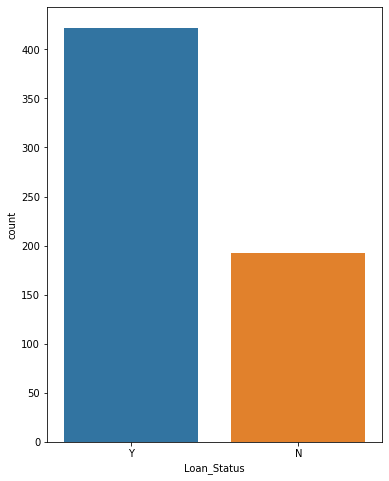

In [14]:
plt.figure(figsize=(6,8))
sns.countplot(df['Loan_Status'])
round(df.Loan_Status.value_counts()/len(df) , 2)

In [15]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

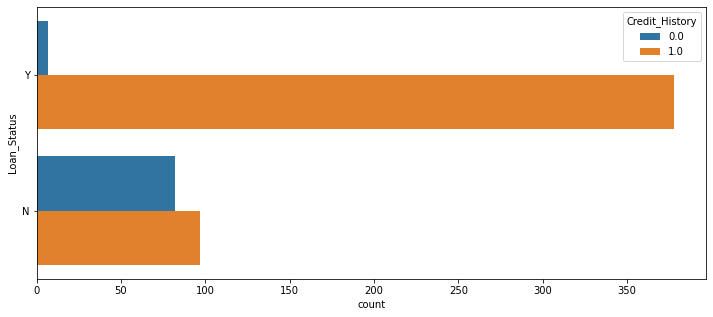

In [29]:
plt.figure(figsize=(12,5))
sns.countplot(data = df ,y='Loan_Status', hue = 'Credit_History')
#good feature

In [24]:

df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

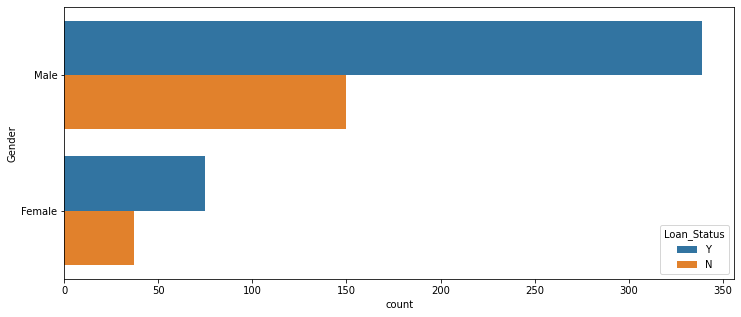

In [28]:
plt.figure(figsize=(12,5))
sns.countplot(data = df ,y='Gender', hue = 'Loan_Status')
#bad feature

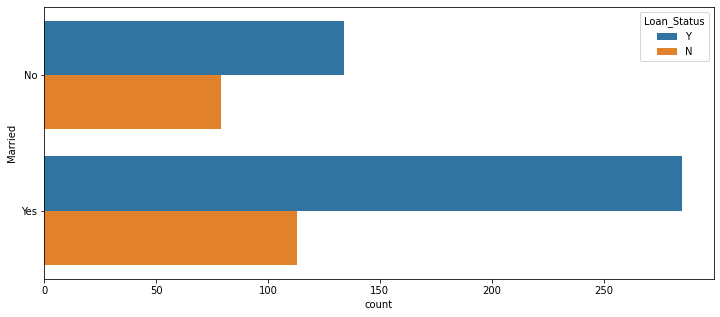

In [30]:
plt.figure(figsize=(12,5))
sns.countplot(data = df ,y='Married', hue = 'Loan_Status')

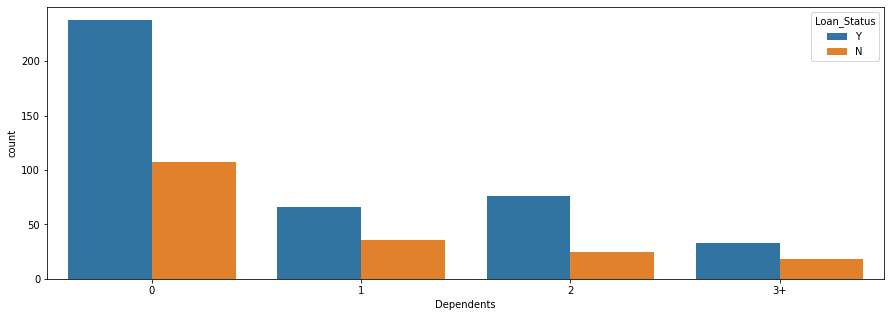

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=df)
#goodfeature

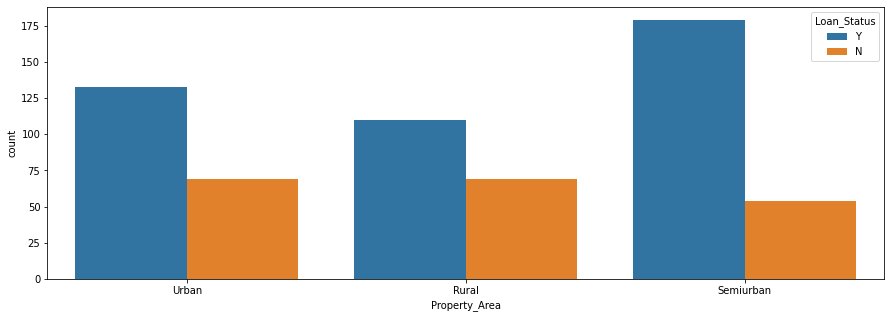

In [33]:

plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)

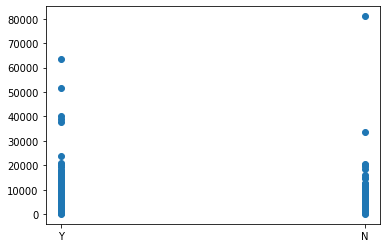

In [36]:
plt.scatter(df.Loan_Status, df.ApplicantIncome)

In [41]:
df.groupby('Loan_Status').median()#coapplicantincome is a good feature

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
N,3833.5,268.0,129.0,360.0
Y,3812.5,1239.5,126.0,360.0


In [42]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [75]:

cat_data = []
num_data = []

for i,c in enumerate(df.dtypes):
    if c == object:
        cat_data.append(df.iloc[:, i])
    else :
        num_data.append(df.iloc[:, i])

In [76]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [77]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [78]:
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

False

In [79]:
num_data = num_data.fillna(method='bfill')
num_data.isnull().sum().any()

False

In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
le =LabelEncoder()

target_values = {'Y': 0 , 'N' : 1}

target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)

target = target.map(target_values)
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,Male,No,0,Graduate,No,1.0,Urban
1,Male,Yes,1,Graduate,No,1.0,Rural
2,Male,Yes,0,Graduate,Yes,1.0,Urban
3,Male,Yes,0,Not Graduate,No,1.0,Urban
4,Male,No,0,Graduate,No,1.0,Urban


In [82]:

for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [83]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


In [85]:
df = pd.concat([cat_data, num_data, target], axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,5849.0,0.0,128.0,360.0,0
1,1,1,1,0,0,1,0,4583.0,1508.0,128.0,360.0,1
2,1,1,0,0,1,1,2,3000.0,0.0,66.0,360.0,0
3,1,1,0,1,0,1,2,2583.0,2358.0,120.0,360.0,0
4,1,0,0,0,0,1,2,6000.0,0.0,141.0,360.0,0


In [88]:
X = pd.concat([cat_data,num_data], axis =1)
y = target

In [89]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

# almost same ratio
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',df['Loan_Status'].value_counts().values/ len(df))

X_train shape (491, 11)
y_train shape (491,)
X_test shape (123, 11)
y_test shape (123,)

ratio of target in y_train : [0.68635438 0.31364562]
ratio of target in y_test : [0.69105691 0.30894309]
ratio of target in original_data : [0.68729642 0.31270358]


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42),
    'RandomForestClassifier': RandomForestClassifier(max_depth=1, random_state=42)
}

In [102]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [103]:

def train_eval_train(models, X, y):
    for name, model in models.items():
        print(name,':')
        model.fit(X, y)
        loss(y, model.predict(X))
        print('-'*30)
        
train_eval_train(models, X_train, y_train)

LogisticRegression :
  pre: 0.930
  rec: 0.429
  f1: 0.587
  loss: 6.542
  acc: 0.811
------------------------------
KNeighborsClassifier :
  pre: 0.667
  rec: 0.364
  f1: 0.471
  loss: 8.863
  acc: 0.743
------------------------------
SVC :
  pre: 1.000
  rec: 0.013
  f1: 0.026
  loss: 10.692
  acc: 0.690
------------------------------
DecisionTreeClassifier :
  pre: 0.929
  rec: 0.422
  f1: 0.580
  loss: 6.612
  acc: 0.809
------------------------------
RandomForestClassifier :
  pre: 1.000
  rec: 0.013
  f1: 0.026
  loss: 10.692
  acc: 0.690
------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [104]:
# train_eval_cross

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

def train_eval_cross(models, X, y, folds):
    # we will change X & y to dataframe because we will use iloc (iloc don't work on numpy array)
    X = pd.DataFrame(X) 
    y = pd.DataFrame(y)
    idx = [' pre', ' rec', ' f1', ' loss', ' acc']
    for name, model in models.items():
        ls = []
        print(name,':')

        for train, test in folds.split(X, y):
            model.fit(X.iloc[train], y.iloc[train]) 
            y_pred = model.predict(X.iloc[test]) 
            ls.append(loss(y.iloc[test], y_pred, retu=True))
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx))  #[0] because we don't want to show the name of the column
        print('-'*30)
        
train_eval_cross(models, X_train, y_train, skf)


LogisticRegression :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

              0
 pre   0.894048
 rec   0.422500
 f1    0.562733
 loss  6.752695
 acc   0.804490
------------------------------
KNeighborsClassifier :
               0
 pre    0.379834
 rec    0.207500
 f1     0.259954
 loss  12.381887
 acc    0.641510
------------------------------
SVC :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to contr

               0
 pre    0.000000
 rec    0.000000
 f1     0.000000
 loss  11.043955
 acc    0.680245
------------------------------
DecisionTreeClassifier :
              0
 pre   0.919048
 rec   0.422500
 f1    0.565740
 loss  6.611717
 acc   0.808571
------------------------------
RandomForestClassifier :


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to co

               0
 pre    0.100000
 rec    0.006667
 f1     0.012500
 loss  10.762001
 acc    0.688408
------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


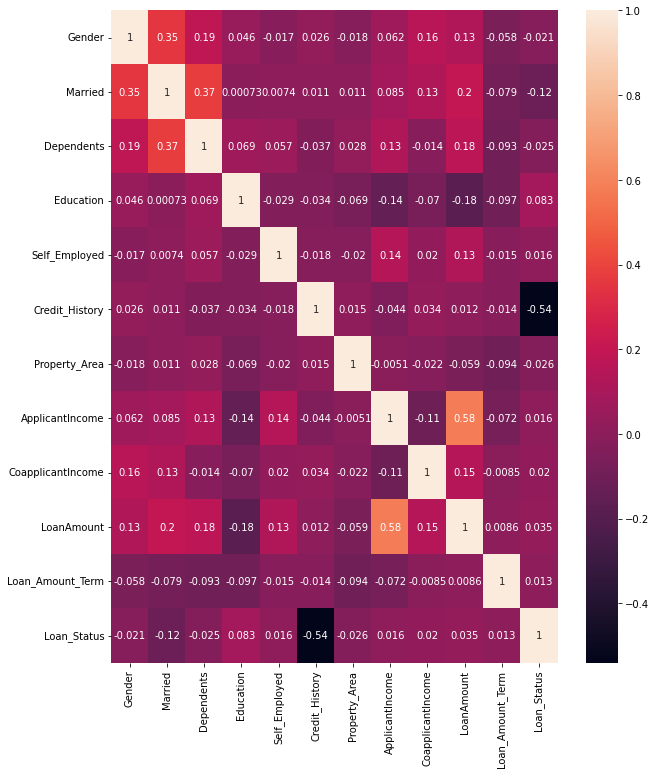

In [106]:
data_corr = pd.concat([X_train, y_train], axis =1)
plt.figure(figsize = (10,12))
sns.heatmap(data_corr.corr(), annot = True)

In [107]:
X_train['new_col'] = X_train['CoapplicantIncome'] / X_train['ApplicantIncome']  
X_train['new_col_2'] = X_train['LoanAmount'] * X_train['Loan_Amount_Term'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


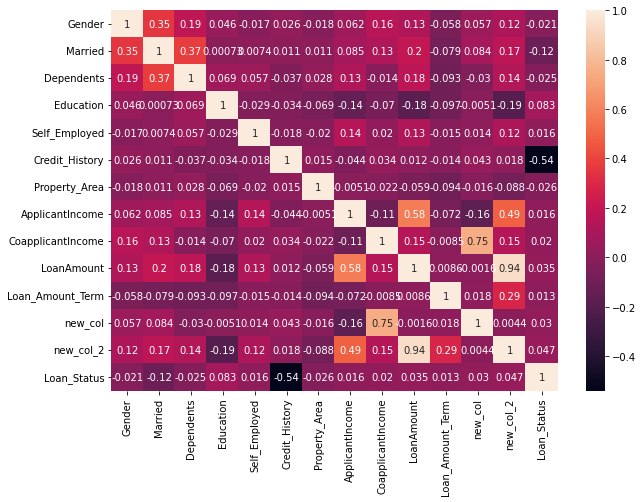

In [108]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [109]:
X_train.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [110]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero

               0
 pre    0.000000
 rec    0.000000
 f1     0.000000
 loss  10.832488
 acc    0.686367
------------------------------
KNeighborsClassifier :


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

               0
 pre    0.313095
 rec    0.169167
 f1     0.218420
 loss  12.880939
 acc    0.627061
------------------------------
SVC :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero

               0
 pre    0.000000
 rec    0.000000
 f1     0.000000
 loss  10.832488
 acc    0.686367
------------------------------
DecisionTreeClassifier :
              0
 pre   0.919048
 rec   0.422500
 f1    0.565740
 loss  6.611717
 acc   0.808571
------------------------------
RandomForestClassifier :


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

               0
 pre    0.100000
 rec    0.006667
 f1     0.012500
 loss  10.762001
 acc    0.688408
------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts(), end='\n------------------------------------------------\n')

1    398
0     93
Name: Gender, dtype: int64
------------------------------------------------
1    315
0    176
Name: Married, dtype: int64
------------------------------------------------
0    292
2     85
1     78
3     36
Name: Dependents, dtype: int64
------------------------------------------------
0    382
1    109
Name: Education, dtype: int64
------------------------------------------------
0    428
1     63
Name: Self_Employed, dtype: int64
------------------------------------------------
1    421
0     70
Name: Credit_History, dtype: int64
------------------------------------------------
1    179
2    170
0    142
Name: Property_Area, dtype: int64
------------------------------------------------
0.000000    222
0.414374      1
0.441544      1
0.556065      1
0.985459      1
           ... 
0.750075      1
0.964755      1
0.743616      1
5.365854      1
0.859254      1
Name: new_col, Length: 270, dtype: int64
------------------------------------------------
43200.0     18
3960

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level funct

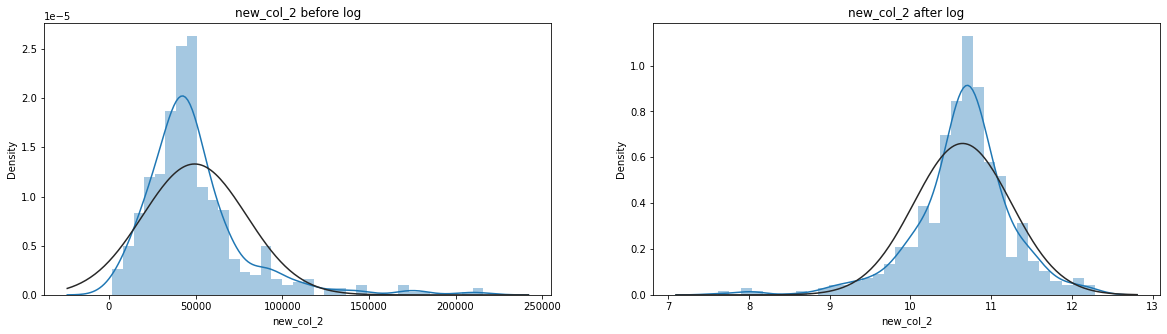

In [112]:

from scipy.stats import norm

fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.distplot(X_train['new_col_2'], ax=ax[0], fit=norm)
ax[0].set_title('new_col_2 before log')

X_train['new_col_2'] = np.log(X_train['new_col_2'])  # logarithm of all the values

sns.distplot(X_train['new_col_2'], ax=ax[1], fit=norm)
ax[1].set_title('new_col_2 after log');

In [113]:
print('before:')
print(X_train['new_col'].value_counts())

X_train['new_col'] = [x if x==0 else 1 for x in X_train['new_col']]
print('-'*50)
print('\nafter:')
print(X_train['new_col'].value_counts())

before:
0.000000    222
0.414374      1
0.441544      1
0.556065      1
0.985459      1
           ... 
0.750075      1
0.964755      1
0.743616      1
5.365854      1
0.859254      1
Name: new_col, Length: 270, dtype: int64
--------------------------------------------------

after:
1.0    269
0.0    222
Name: new_col, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [114]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

              0
 pre   0.910714
 rec   0.422500
 f1    0.562606
 loss  6.682206
 acc   0.806531
------------------------------
KNeighborsClassifier :
              0
 pre   0.719762
 rec   0.298333
 f1    0.406231
 loss  9.074569
 acc   0.737265
------------------------------
SVC :


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

              0
 pre   0.819048
 rec   0.324167
 f1    0.458747
 loss  7.669026
 acc   0.777959
------------------------------
DecisionTreeClassifier :
              0
 pre   0.919048
 rec   0.422500
 f1    0.565740
 loss  6.611717
 acc   0.808571
------------------------------
RandomForestClassifier :


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to co

               0
 pre    0.200000
 rec    0.013333
 f1     0.025000
 loss  10.691513
 acc    0.690449
------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


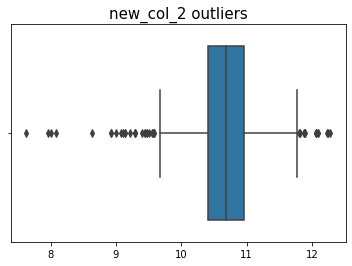

In [115]:
sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 outliers', fontsize=15);
plt.xlabel('');

In [118]:
threshold = 1.5            
new_col_2_out = X_train['new_col_2']
q25, q75 = np.percentile(new_col_2_out, 25), np.percentile(new_col_2_out, 75) # Q25, Q75
print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in new_col_2_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

data_outliers = pd.concat([X_train, y_train], axis=1)
print('\nlen X_train before dropping the outliers', len(data_outliers))
data_outliers = data_outliers.drop(data_outliers[(data_outliers['new_col_2'] > upper) | (data_outliers['new_col_2'] < lower)].index)

print('len X_train after dropping the outliers', len(data_outliers))

Quartile 25: 10.416008100285975 , Quartile 75: 10.961277846683982
iqr: 0.5452697463980076
Cut Off: 0.8179046195970114
Lower: 9.598103480688962
Upper: 11.779182466280993
Nubers of Outliers: 39
outliers:[12.092679958175083, 8.930626469173578, 7.620705086838262, 12.254862809699606, 7.965545573129992, 9.574983485564092, 9.392661928770137, 9.578311275656766, 9.587406005562649, 9.112948025967533, 8.006367567650246, 9.144200569471638, 9.287301413112312, 9.441452092939569, 9.287301413112312, 12.059890135352092, 8.626944055375356, 9.51044496442652, 11.81569317484005, 9.441452092939569, 8.922658299524402, 9.287301413112312, 11.889991098556695, 12.059890135352092, 12.059890135352092, 12.231740392278752, 9.469622969906265, 9.137769679141348, 11.799607037088427, 9.084777149000837, 9.21830854162536, 8.99961934066053, 8.083328608786376, 12.283033686666302, 9.549665677579801, 11.877568578558138, 11.877568578558138, 12.100712129872347, 9.441452092939569]

len X_train before dropping the outliers 491
le

In [119]:
X_train = data_outliers.drop('Loan_Status', axis=1)
y_train = data_outliers['Loan_Status']

In [120]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

              0
 pre   0.907500
 rec   0.442857
 f1    0.587307
 loss  6.423889
 acc   0.814010
------------------------------
KNeighborsClassifier :


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

              0
 pre   0.755873
 rec   0.342857
 f1    0.459636
 loss  8.341061
 acc   0.758502
------------------------------
SVC :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to contr

              0
 pre   0.643333
 rec   0.235714
 f1    0.340616
 loss  8.406109
 acc   0.756618
------------------------------
DecisionTreeClassifier :
              0
 pre   0.920833
 rec   0.442857
 f1    0.589413
 loss  6.347135
 acc   0.816232
------------------------------
RandomForestClassifier :


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to co

               0
 pre    0.100000
 rec    0.007143
 f1     0.013333
 loss  10.621925
 acc    0.692464
------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
X_test_new = X_test.copy()

In [122]:
x = []

X_test_new['new_col'] = X_test_new['CoapplicantIncome'] / X_test_new['ApplicantIncome']  
X_test_new['new_col_2'] = X_test_new['LoanAmount'] * X_test_new['Loan_Amount_Term']
X_test_new.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

X_test_new['new_col_2'] = np.log(X_test_new['new_col_2'])

X_test_new['new_col'] = [x if x==0 else 1 for x in X_test_new['new_col']]

In [123]:
for name,model in models.items():
    print(name, end=':\n')
    loss(y_test, model.predict(X_test_new))
    print('-'*40)

LogisticRegression:
  pre: 0.850
  rec: 0.447
  f1: 0.586
  loss: 6.739
  acc: 0.805
----------------------------------------
KNeighborsClassifier:
  pre: 0.615
  rec: 0.421
  f1: 0.500
  loss: 8.986
  acc: 0.740
----------------------------------------
SVC:
  pre: 0.867
  rec: 0.342
  f1: 0.491
  loss: 7.582
  acc: 0.780
----------------------------------------
DecisionTreeClassifier:
  pre: 0.895
  rec: 0.447
  f1: 0.596
  loss: 6.458
  acc: 0.813
----------------------------------------
RandomForestClassifier:
  pre: 0.000
  rec: 0.000
  f1: 0.000
  loss: 10.671
  acc: 0.691
----------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
